Plan:
1. Angelas Code in meinen übersetzen
2. aus Angelas Code alle möglichen Mutationen rausschreiben, aber nur einmal
2. --> Liste mit allen vorkommenden Mutationen
3. Funktion schreiben, die für jede dieser (einzeln!) alle Sequenzen raussucht in der diese vorkommt
4. --> ein dataframe, mit mutation als spaltenname und allen sequenzen wo es drin vorkommt als Reihen drunter und noch einer Spalte mit mutcount dahinter, pro Mutation werden zwei Spalten an den dataframe angehängt
5. (dadurch können Reihen spezifisch nach mutcount angeprochen werden)
6. innerhalb einer Mutationsspalte, alle mit dem selben mutcount: fscore vergleich : Varianz der Werte als Maß für impact
-> je unwichtiger die Mutation, desto weniger macht sie was beim fscore, desto weniger sollten sich die Werte unterscheiden, desto kleiner sollte die Varianz sein

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

In [3]:
# Datensatz einlesen
original_dms_data = pd.read_csv('/Users/liza/Desktop/Bioinfo Project/DMS_data/GFP_AEQVI_Sarkisyan_2016.csv')
# split first column of df into multiple columns
original_dms_data_col = original_dms_data
only_mutants = original_dms_data["mutant"].to_frame()
original_dms_data_col[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']] = original_dms_data_col['mutant'].str.split(':', 15, expand=True)
original_dms_data_col.head()


/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_67455/404050330.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  original_dms_data_col[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']] = original_dms_data_col['mutant'].str.split(':', 15, expand=True)


,mutant,mutated_sequence,DMS_score,DMS_score_bin,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15
0,K3R:V55A:Q94R:A110T:D117G:M153K:D216A,MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1.301030,0,K3R,V55A,Q94R,A110T,D117G,M153K,D216A,None,None,None,None,None,None,None,None
1,K3Q:V16A:I167T:L195Q,MSQGEELFTGVVPILAELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.137350,1,K3Q,V16A,I167T,L195Q,None,None,None,None,None,None,None,None,None,None,None
2,K3Q:Y143C:N164D:S205P:A227T,MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1.553913,0,K3Q,Y143C,N164D,S205P,A227T,None,None,None,None,None,None,None,None,None,None
3,K3Q:Y143N:V193A,MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.404237,1,K3Q,Y143N,V193A,None,None,None,None,None,None,None,None,None,None,None,None
4,K3R,MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.738586,1,K3R,None,None,None,None,None,None,None,None,None,None,None,None,None,None


Dataframe erstellen aus den Spalten: (WORKING_DATAFRAME)
- Mutationsanzahl aus df_mutation_counts
- fscore aus original_dms_data_col
- m1 bis b11 aus original_dms_data_col

In [4]:
# zählen wieviele Mutationen jede Sequenz hat
list_mut_count_in_progress = []
for i in range(len(original_dms_data['mutant'])):
    list_mut_count_in_progress.append(original_dms_data['mutant'].iloc[i].count(':'))
list_mut_count_prae = np.array(list_mut_count_in_progress)
list_mut_count = (list_mut_count_prae + 1)
df_mutation_counts = pd.DataFrame(list_mut_count)

In [5]:
#zusammenfügen
working_dataframe_prae = pd.concat([original_dms_data_col, df_mutation_counts], axis="columns")
#alle Spalten löschen die stören
working_dataframe = working_dataframe_prae.drop(['mutant', 'mutated_sequence', 'DMS_score_bin'], axis=1)
working_dataframe.rename(columns={working_dataframe.columns[16]: 'mut_count'}, inplace=True)
working_dataframe.head()

,DMS_score,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,mut_count
0,1.301030,K3R,V55A,Q94R,A110T,D117G,M153K,D216A,None,None,None,None,None,None,None,None,7
1,3.137350,K3Q,V16A,I167T,L195Q,None,None,None,None,None,None,None,None,None,None,None,4
2,1.553913,K3Q,Y143C,N164D,S205P,A227T,None,None,None,None,None,None,None,None,None,None,5
3,3.404237,K3Q,Y143N,V193A,None,None,None,None,None,None,None,None,None,None,None,None,3
4,3.738586,K3R,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1


In [6]:
#alle möglichen Mutationen rausschreiben in den Spalten
from pandas import unique
working_dataframe_only_ms = working_dataframe.loc[:, ["m1", "m2", "m3", 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']]
working_dataframe_only_ms.head()


,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15
0,K3R,V55A,Q94R,A110T,D117G,M153K,D216A,None,None,None,None,None,None,None,None
1,K3Q,V16A,I167T,L195Q,None,None,None,None,None,None,None,None,None,None,None
2,K3Q,Y143C,N164D,S205P,A227T,None,None,None,None,None,None,None,None,None,None
3,K3Q,Y143N,V193A,None,None,None,None,None,None,None,None,None,None,None,None
4,K3R,None,None,None,None,None,None,None,None,None,None,None,None,None,None


1. alle Werte des DataFrames mit values.flatten() in eine eindimensionale Liste umgewandeln
2. tolist() verwendet, um die Liste in eine normale Python-Liste umzuwandeln
3.  Liste in ein Set umgewandeln (nur eindeutige Elemente)
4. set zurück in Liste

In [7]:
all_possible_mutations = working_dataframe_only_ms.values.flatten().tolist()
all_possible_mutations = list(set(all_possible_mutations))
#hat einen none Wert, weil der auch ein Wert in der Liste ist -> wegmachen
while None in all_possible_mutations:
    all_possible_mutations.remove(None)
print(all_possible_mutations)

['N159G', 'Y151V', 'M233L', 'S205C', 'D234G', 'N146K', 'E235V', 'G51S', 'N212S', 'D197V', 'P56A', 'Y237D', 'I188Y', 'P89A', 'T230F', 'N198E', 'T225S', 'L18V', 'V22I', 'N144Y', 'E111A', 'E90V', 'S175N', 'N170G', 'H181P', 'D103H', 'F71L', 'K45G', 'D76A', 'P56L', 'G174V', 'N170F', 'Y143D', 'F99P', 'G127A', 'M218S', 'V16F', 'G24N', 'T59A', 'H148R', 'S147T', 'T43C', 'H148D', 'L125P', 'D21V', 'V112A', 'S72C', 'Q80L', 'E32V', 'D180V', 'R109S', 'K79G', 'I188D', 'V68R', 'P75R', 'Q183E', 'V176A', 'T186P', 'Y145D', 'K140T', 'E17A', 'I152D', 'C70H', 'D197E', 'L194R', 'V112I', 'V68E', 'M78A', 'C48R', 'T118I', 'K209T', 'H217C', 'P187A', 'K166M', 'N170D', 'D36E', 'K45N', 'A227V', 'E132K', 'D173H', 'H181L', 'Q94H', 'A226S', 'H139Y', 'A154G', 'A227T', 'D102A', 'F8N', 'L60A', 'K107R', 'G127S', 'F99T', 'S147D', 'N105L', 'E17D', 'L64V', 'D129S', 'Y66S', 'V11T', 'M78T', 'I123D', 'S28H', 'H199R', 'G35S', 'D190E', 'I128Y', 'K166D', 'T203N', 'K107M', 'S208G', 'Y151F', 'G174C', 'G4N', 'K156T', 'G160V', 'I188V'

In [8]:
only_mutants_list = only_mutants['mutant']
only_mutants_list

0        K3R:V55A:Q94R:A110T:D117G:M153K:D216A
1                         K3Q:V16A:I167T:L195Q
2                  K3Q:Y143C:N164D:S205P:A227T
3                              K3Q:Y143N:V193A
4                                          K3R
                         ...                  
51709                                    Y237N
51710                                    Y237C
51711                                    Y237D
51712                                    Y237F
51713                                    Y237H
Name: mutant, Length: 51714, dtype: object

In [9]:
resultingg_mutss = pd.DataFrame()
substring = 'V193A'

# Boolianischen Wert ausgeben, ob der Substring in einer Zeile existiert
resultingg_mutss['V193A'] = pd.DataFrame(only_mutants['mutant'].apply(lambda x: substring in x))

print(resultingg_mutss)

       V193A
0      False
1      False
2      False
3       True
4      False
...      ...
51709  False
51710  False
51711  False
51712  False
51713  False

[51714 rows x 1 columns]


In [10]:
list_of_dfs = []

# For-Loop zum Erstellen und Hinzufügen eines neuen Columns in jedem Durchlauf
for i in all_possible_mutations:
    new_column_name = f'{i}'
    new_column_values = [only_mutants_list.str.contains(i, regex= False)]
    new_df = pd.DataFrame({new_column_name: new_column_values})
    new_df_exploded = new_df.explode(new_column_name)
    list_of_dfs.append(new_df_exploded)

# Verketten der DataFrames in der Liste
result_how_often = pd.concat(list_of_dfs, axis=1)
result_how_often = result_how_often.reset_index(drop=True)

result_how_often.to_csv('dataframe_mutanten_Mutationen.csv', index=True)

der Dataframe ist nur SEHR groß und lädt nirgendwo komplett, aber ich habe einzelne Werte kontrolliert und die stimmen
-> hoffentlich stimmt er komplett, jetzt kann man damit weiterarbeiten
TESTS: (mit Original_csv abstimmen)

In [11]:
cell_value = result_how_often.at[17, 'H77L']
print(cell_value)

True


In [151]:
matching_indexes = result_how_often.loc[result_how_often["H77L"] == True].index

# Ausgabe der übereinstimmenden Zeilenindizes
len(matching_indexes)
#soll: 244 (mit Suchfunktion in Excel abgestimmt :) )

244

NEXT PART: an einer Mutation (H77L)
1. alle Zeilenindexes wo true steht in der einen Spalte ausgeben lassen yes
2. diesleben Zeilen aus der Originaltabelle rausholen lassen yes
3. mit Mutationscount matchen (working_dataframe) yes
4. alle fscores von den Sequenzen mit vier Mutationen ausgeben lassen yes
5. -> Verteilung -> Varianz yes

In [13]:
# dataframe aus original machen der nur mutcount und fscore hat
count_fscore_frame = working_dataframe[['DMS_score', 'mut_count']]
count_fscore_frame

,DMS_score,mut_count
0,1.301030,7
1,3.137350,4
2,1.553913,5
3,3.404237,3
4,3.738586,1
...,...,...
51709,3.809468,1
51710,3.760217,1
51711,3.754101,1
51712,3.673173,1


In [14]:
K166Q_count_fscore = count_fscore_frame.loc[result_how_often['K166Q'] == True]
fscore_2_K166Q = K166Q_count_fscore['DMS_score'].loc[K166Q_count_fscore['mut_count'] == 2]
varianz_K166Q = fscore_2_K166Q.var()
varianz_K166Q

0.015426224360537455

In [15]:
#vergleich mit einer anderen Mutation
K3R_count_fscore = count_fscore_frame.loc[result_how_often['K3R'] == True]
fscore_2_K3R = K3R_count_fscore['DMS_score'].loc[K3R_count_fscore['mut_count'] == 2]
varianz_K3R = fscore_2_K3R.var()
varianz_K3R

0.2736357484727858

--> klappt: anscheinend ist die K166Q Mutation eher wichtig als die K3R -> passt zu den Angaben im paper

NOW: auf alle Anwenden
1. immer alle mit gleichem mutcount zusammen und alle Mutationen aufzählen yes
2. !! irgendwie berücksichtigen wie viele Werte es für diesen count gibt !! -> ab welchem Wert macht es Sinn? yes
3. (vielleicht erstmal Graph mit den Varianzen gegen die ANzahl der Werte?) yes


In [16]:
variance_per_mutant_2_list = []

for i in all_possible_mutations:
    mut_count_fscore_2 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_2_mut = mut_count_fscore_2['DMS_score'].loc[mut_count_fscore_2['mut_count'] == 2]
    varianz_mut_2 = fscore_2_mut.var()
    variance_per_mutant_2_list.append(varianz_mut_2)

variance_per_mutant_2_series = pd.Series(variance_per_mutant_2_list, index=all_possible_mutations)
variance_per_mutant_2_df = variance_per_mutant_2_series.to_frame()

print(variance_per_mutant_2_df)

              0
N159G       NaN
Y151V       NaN
M233L  0.333851
S205C  0.000139
D234G  0.275967
...         ...
H169Q  0.016539
V193G  0.898713
H25Y   0.007044
L18P   0.030344
M233V  0.302316

[1810 rows x 1 columns]


In [128]:
#rausfinden wie viele Daten wir jeweils haben zum berechnen
how_many_for_variance_2 = []

for i in all_possible_mutations:
    mut_count_fscore_2 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_2_mut = mut_count_fscore_2['DMS_score'].loc[mut_count_fscore_2['mut_count'] == 2]
    wie_viel_jeweils_2 = len(fscore_2_mut)
    how_many_for_variance_2.append(wie_viel_jeweils_2)

how_many_for_variance_2 = pd.Series(how_many_for_variance_2, index=all_possible_mutations)
how_many_for_variance_2_df = how_many_for_variance_2.to_frame()

print(how_many_for_variance_2_df)
max_wert_spalte1 = how_many_for_variance_2_df[0].max()
print("Höchster Wert in Spalte1:", max_wert_spalte1)

        0
N159G   0
Y151V   0
M233L  35
S205C   3
D234G  94
...    ..
H169Q   2
V193G  11
H25Y   16
L18P   27
M233V  75

[1810 rows x 1 columns]
Höchster Wert in Spalte1: 133


In [19]:
how_many_AND_variance_df_2 = pd.concat([how_many_for_variance_2_df, variance_per_mutant_2_df], axis = 1)
how_many_AND_variance_df_2.columns = ['Anzahl benutzter Werte', 'Varianz']
how_many_AND_variance_df_2 = how_many_AND_variance_df_2.dropna()
how_many_AND_variance_df_2

,Anzahl benutzter Werte,Varianz
M233L,35,0.333851
S205C,3,0.000139
D234G,94,0.275967
N146K,3,1.850321
E235V,23,0.034251
...,...,...
H169Q,2,0.016539
V193G,11,0.898713
H25Y,16,0.007044
L18P,27,0.030344


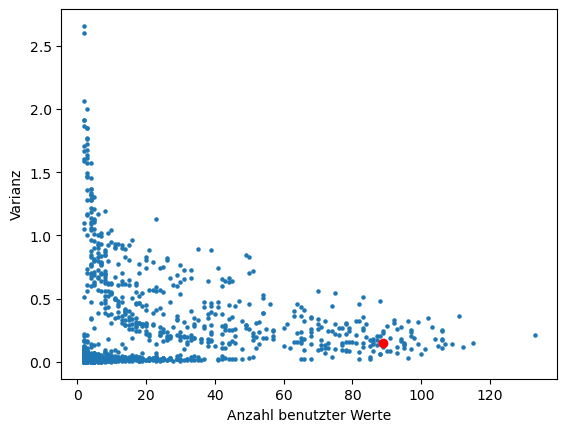

In [20]:
import matplotlib.pyplot as plt
#scatter plot erstellen, mit benennungen
plt.scatter(how_many_AND_variance_df_2['Anzahl benutzter Werte'],how_many_AND_variance_df_2['Varianz'], s = 5 )
plt.xlabel('Anzahl benutzter Werte')
plt.ylabel('Varianz')
#die angeblich highest gerankte mut in rot färben
plt.scatter(how_many_AND_variance_df_2['Anzahl benutzter Werte']['V163A'],how_many_AND_variance_df_2['Varianz']['V163A'], c='red')
# Diagramm anzeigen
plt.show()

--> die Werte WICHTIG mit hoher Anzahl an benutzter Werte und mit niedriger Varianz

zuerst:
--> code auf alle Anzahlen von Mutationen anwenden: -> damit ich danach auf alle zugreifen kann auf Mutation basierend

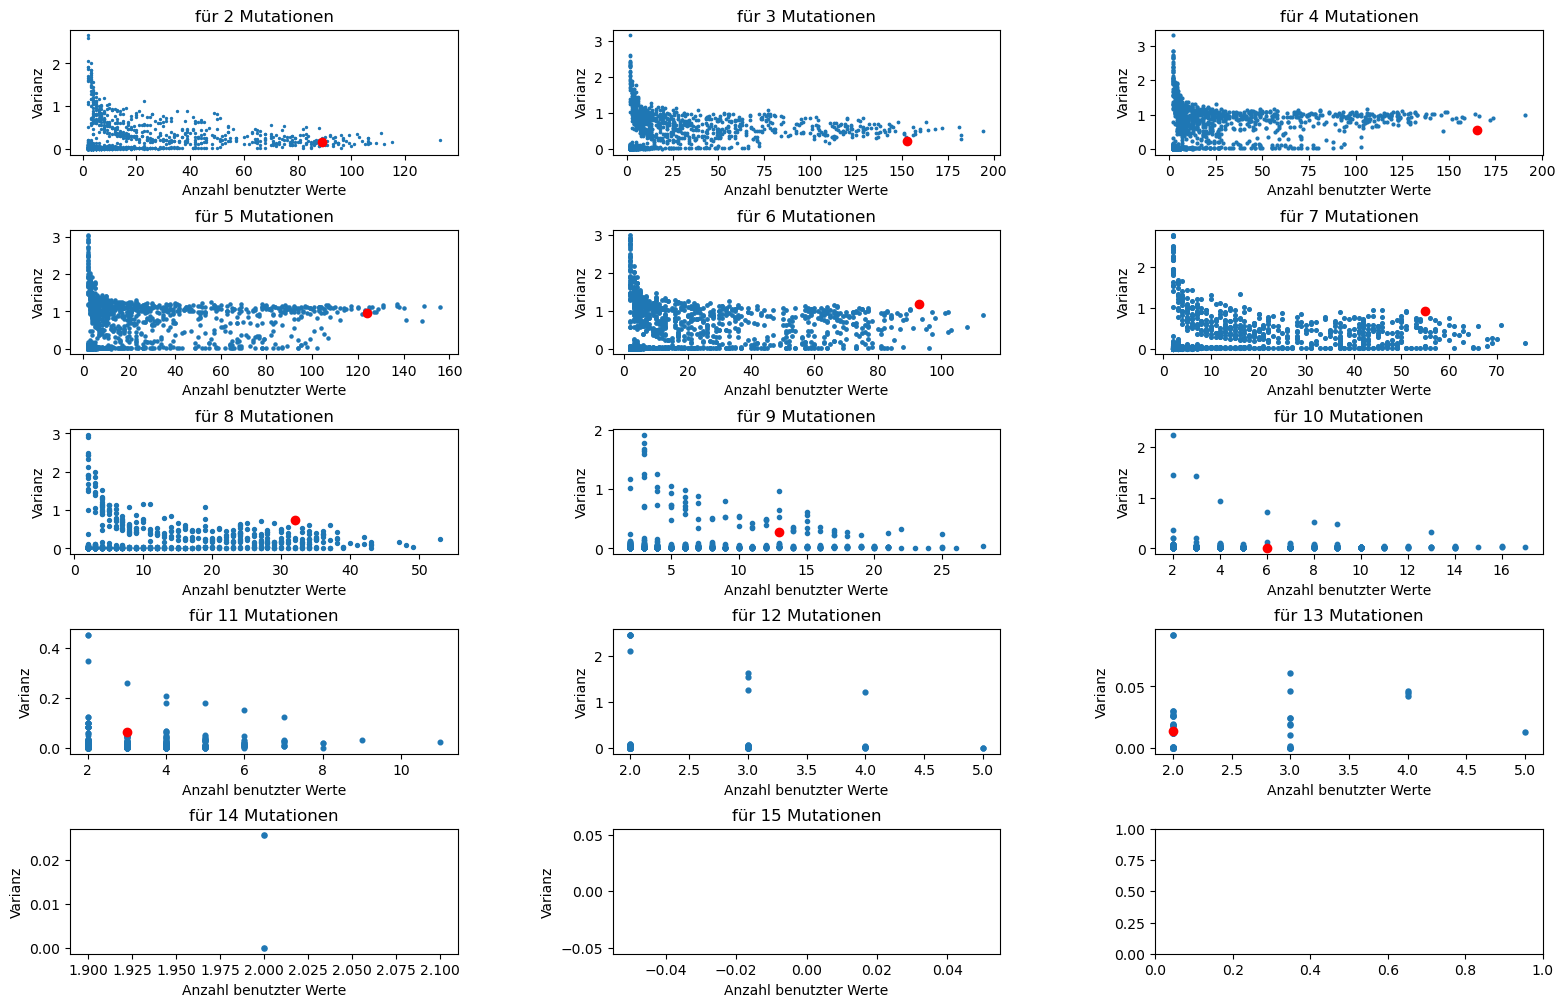

In [21]:
#verallgemeinert
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(19, 12))  # Abbildung und Achsenobjekte erstellen
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for j, ax in zip(range(2, 16), axes.flatten()):
    variance_per_mutant_list = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        varianz_mut = fscore_mut.var()
        variance_per_mutant_list.append(varianz_mut)

    variance_per_mutant_series = pd.Series(variance_per_mutant_list, index=all_possible_mutations)
    variance_per_mutant_df = variance_per_mutant_series.to_frame()


#rausfinden wie viele Daten wir jeweils haben zum berechnen
    how_many_for_variance = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        wie_viel_jeweils = len(fscore_mut)
        how_many_for_variance.append(wie_viel_jeweils)

    how_many_for_variance = pd.Series(how_many_for_variance, index=all_possible_mutations)
    how_many_for_variance_df = how_many_for_variance.to_frame()


    how_many_AND_variance_df = pd.concat([how_many_for_variance_df, variance_per_mutant_df], axis = 1)
    how_many_AND_variance_df.columns = ['Anzahl benutzter Werte', 'Varianz']
    how_many_AND_variance_df = how_many_AND_variance_df.dropna()

#scatter plot erstellen, mit benennungen
    ax.scatter(how_many_AND_variance_df['Anzahl benutzter Werte'],how_many_AND_variance_df['Varianz'], s = j )
    ax.set_xlabel('Anzahl benutzter Werte')
    ax.set_ylabel('Varianz')

    if "V163A" in how_many_AND_variance_df.index:
        ax.scatter(how_many_AND_variance_df['Anzahl benutzter Werte']['V163A'],how_many_AND_variance_df['Varianz']['V163A'], c='red')
    ax.set_title(f'für {j} Mutationen')
# Diagramm anzeigen

plt.show()


Following up:
1. welche mutation hat overall die geringste varianz + die meisten Werte? (->ist am "besten") -> erstes ranking, welche am stabilisierendsten ist

danach:
1. Graph Anzahl der Mutationen gegen den fitness score je Mutation, Graph wie in dem einen paper
2. alle die Graphen in einen -> das was am meisten rechts ist -> zweites ranking


1. Werte pro Mutation mitteln (mittel über Anzahl der Daten und Mittel über Varianz) und die dann ranken

In [136]:
#Varianzen mitteln für jede Mutation, über die Mutationscounts hinweg
frame_zum_mitteln_variance = pd.DataFrame(index = all_possible_mutations)
variance_per_mutant_count_list = []

# ACHTUNG: es werden nur counts von 2 bis 7 einbezogen weil die mit mehr sowieso "kaputt" sind!!!
for j, ax in zip(range(2, 8), axes.flatten()):
    variance_per_mutant_list = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        varianz_mut = fscore_mut.var()  #die varianz je mutation je anzahl
        variance_per_mutant_list.append(varianz_mut) #liste der Varianzen ALLER Mutationen je anzahl

    variance_per_mutant_df = pd.DataFrame(variance_per_mutant_list, index=all_possible_mutations)
    variance_per_mutant_count_list.append(variance_per_mutant_df)
variance_per_mutant_count_df = pd.concat(variance_per_mutant_count_list, axis=1)
variance_per_mutant_count_df.set_axis(range(2,8), axis=1, inplace=True)

# Varianz je Mutation je Mutationanzahl
variance_per_mutant_count_df
# dataframe mit allen varianzen (Zellen) pro alle mutationen (rows) pro alle counts (columns)

/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_67455/3111823606.py:18: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  variance_per_mutant_count_df.set_axis(range(2,8), axis=1, inplace=True)


,2,3,4,5,6,7
N159G,NaN,NaN,0.040565,0.000747,NaN,NaN
Y151V,NaN,NaN,NaN,NaN,NaN,NaN
M233L,0.333851,0.568393,1.155872,1.209595,1.145988,1.075007e+00
S205C,0.000139,1.119822,NaN,0.005907,NaN,NaN
D234G,0.275967,0.637270,0.984989,1.103906,0.875654,5.124282e-01
...,...,...,...,...,...,...
H169Q,0.016539,1.798770,1.297191,NaN,0.000004,8.806636e-13
V193G,0.898713,0.779929,1.023956,0.821148,0.011830,NaN
H25Y,0.007044,0.331211,1.024586,1.124356,1.029360,1.016240e+00
L18P,0.030344,0.028734,0.021608,0.011293,0.024794,2.792269e-02


-> 15 gibt es keine zwei Mutationen die sich in einer Mutation überschneiden -> keine Werte

In [137]:
mean_variances_per_mutations = pd.DataFrame(variance_per_mutant_count_df.mean(axis=1, skipna=True), columns=['Mean'])

# Ausgabe des neuen DataFrames
print(mean_variances_per_mutations)

           Mean
N159G  0.020656
Y151V       NaN
M233L  0.914784
S205C  0.375289
D234G  0.731702
...         ...
H169Q  0.622501
V193G  0.707115
H25Y   0.755466
L18P   0.024116
M233V  0.681085

[1810 rows x 1 columns]


In [138]:
how_many_per_mutant_count_list = []

for j, ax in zip(range(2, 8), axes.flatten()):
    how_many_for_variance = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        wie_viel_jeweils = len(fscore_mut)
        how_many_for_variance.append(wie_viel_jeweils)

    how_many_per_mutant_df = pd.DataFrame(how_many_for_variance, index=all_possible_mutations)
    how_many_per_mutant_count_list.append(how_many_per_mutant_df)
how_many_per_mutant_count_df = pd.concat(how_many_per_mutant_count_list, axis=1)
how_many_per_mutant_count_df.set_axis(range(2,8), axis=1, inplace=True)

# Varianz je Mutation je Mutationanzahl
how_many_per_mutant_count_df

/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_67455/3729407745.py:15: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  how_many_per_mutant_count_df.set_axis(range(2,8), axis=1, inplace=True)


,2,3,4,5,6,7
N159G,0,1,2,2,1,0
Y151V,0,0,0,0,0,1
M233L,35,47,49,40,23,13
S205C,3,4,1,2,1,0
D234G,94,144,116,108,87,54
...,...,...,...,...,...,...
H169Q,2,2,2,0,2,2
V193G,11,10,12,7,6,1
H25Y,16,12,23,11,14,6
L18P,27,53,80,78,52,34


In [139]:
mean_how_many_per_mutations = pd.DataFrame(how_many_per_mutant_count_df.mean(axis=1, skipna=True), columns=['Mean'])

# Ausgabe des neuen DataFrames
print(mean_how_many_per_mutations)

             Mean
N159G    1.000000
Y151V    0.166667
M233L   34.500000
S205C    1.833333
D234G  100.500000
...           ...
H169Q    1.666667
V193G    7.833333
H25Y    13.666667
L18P    54.000000
M233V   84.166667

[1810 rows x 1 columns]


In [149]:
combined_means_variance_how_many = pd.concat([mean_variances_per_mutations, mean_how_many_per_mutations], axis=1)
combined_means_variance_how_many.columns = ['mean_variances_per_mutations', 'mean_how_many_per_mutations']
combined_means_variance_how_many['Rank'] = combined_means_variance_how_many['mean_variances_per_mutations'].rank(ascending=False) - combined_means_variance_how_many['mean_how_many_per_mutations'].rank()



sorted_df = combined_means_variance_how_many.sort_values(by='mean_variances_per_mutations')

# Ausgabe des sortierten DataFrames
combined_means_variance_how_many

,mean_variances_per_mutations,mean_how_many_per_mutations,Rank
N159G,0.020656,1.000000,806.0
Y151V,NaN,0.166667,NaN
M233L,0.914784,34.500000,-1366.5
S205C,0.375289,1.833333,347.0
D234G,0.731702,100.500000,-1464.0
...,...,...,...
H169Q,0.622501,1.666667,-5.5
V193G,0.707115,7.833333,-771.5
H25Y,0.755466,13.666667,-1006.0
L18P,0.024116,54.000000,-325.0


In [146]:
#nur die die über 20 Werte
threshold = 80

condition = sorted_df['mean_how_many_per_mutations'] < threshold
sorted_df_with_treshold = sorted_df.drop(sorted_df.loc[condition].index)

# Ausgabe des aktualisierten DataFrames


sorted_df_eins = sorted_df_with_treshold.sort_values(by='Rank')

# Ausgabe des sortierten DataFrames
sorted_df_eins

,mean_variances_per_mutations,mean_how_many_per_mutations,Rank
K107R,0.796342,92.833333,-1545.0
D190G,0.791333,90.166667,-1533.0
D117G,0.761510,99.833333,-1516.0
N164D,0.750293,102.833333,-1506.5
T9A,0.760585,87.500000,-1483.0
...,...,...,...
S208G,0.577704,82.500000,-986.5
K79E,0.561433,83.500000,-966.5
K113E,0.506799,85.000000,-888.0
F100L,0.399939,83.500000,-757.5


--> V163A (angeblich beste) ist Top 4, K166Q (zweit beste) ist nicht mal in Aufzählung
--> muss falsche Berechnung sein
--> paper dafür durchsuchen


In [150]:
#Kontrolle weil sollte eigentlich relativ weit oben sein
value_hallo = sorted_df_eins.loc['V163A']
value_hallo #47

mean_variances_per_mutations       0.669434
mean_how_many_per_mutations      113.166667
Rank                           -1327.000000
Name: V163A, dtype: float64

WEITERES VORGEHEN MIT DIESEM CODE:
--> irgendwie mit einberechnen ob die Muts positiv oder negativ stabilisierend sind
--> negativ stabilisierenden rauskürzen
--> hoffentlich Ranking das besser passt